Starting signal processing pipeline...
Generating binary signal...
Performing pulse shaping...
Adding noise...
Generating eye diagram...
Plotting eye diagram...


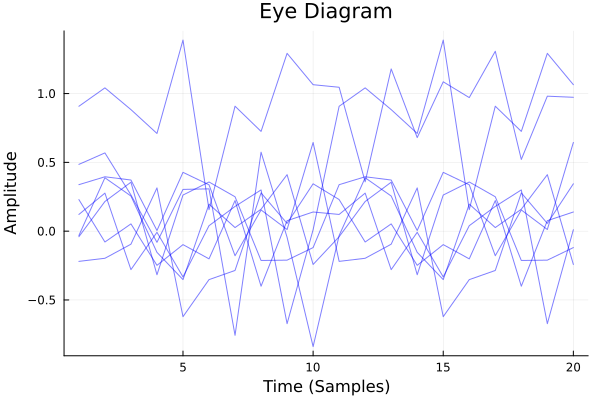

In [4]:
using Plots

# Generate a binary signal
function generate_binary_signal(length::Int)
    println("Generating binary signal...")
    return rand([0.0, 1.0], length)  # Use Float64 for consistency
end

# Pulse shaping (rectangular pulse)
function pulse_shaping(binary_signal::Vector{Float64}, samples_per_bit::Int)
    println("Performing pulse shaping...")
    shaped_signal = Float64[]
    for bit in binary_signal
        append!(shaped_signal, fill(bit, samples_per_bit))
    end
    return shaped_signal
end

# Add noise to the signal
function add_noise(clean_signal::Vector{Float64}, noise_power::Float64)
    println("Adding noise...")
    noise_signal = sqrt(noise_power) .* randn(length(clean_signal))  # Generate Gaussian noise
    return clean_signal .+ noise_signal
end

# Generate the eye diagram
function generate_eye_diagram(input_signal::Vector{Float64}, samples_per_bit::Int, num_traces::Int)
    println("Generating eye diagram...")
    num_samples_per_trace = samples_per_bit * 2  # Two symbols per trace
    eye_traces = Vector{Vector{Float64}}()  # Explicitly define type
    for i in 1:samples_per_bit:(length(input_signal) - num_samples_per_trace)
        push!(eye_traces, Float64[input_signal[i:i + num_samples_per_trace - 1]...])  # Cast slices to Float64
    end
    return eye_traces[1:min(num_traces, length(eye_traces))]  # Handle fewer traces
end

# Plot the eye diagram
function plot_eye_diagram(eye_traces::Vector{Vector{Float64}})
    println("Plotting eye diagram...")
    p = plot(title="Eye Diagram", xlabel="Time (Samples)", ylabel="Amplitude", legend=false)
    for trace in eye_traces
        plot!(1:length(trace), trace, color=:blue, lw=1, alpha=0.5)
    end
    return p
end

# Parameters
signal_length = 10          # Number of bits in the signal
samples_per_bit = 10          # Oversampling factor (samples per bit)
noise_power_level = 0.1       # Noise power
num_traces_to_plot = 50       # Number of traces to show

# Generate and process the signal
println("Starting signal processing pipeline...")
binary_data = generate_binary_signal(signal_length)
pulse_shaped_signal = pulse_shaping(binary_data, samples_per_bit)
noisy_signal_output = add_noise(pulse_shaped_signal, noise_power_level)
eye_diagram_traces = generate_eye_diagram(noisy_signal_output, samples_per_bit, num_traces_to_plot)

# Plot the eye diagram
plot_eye_diagram(eye_diagram_traces)